# Import modules

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import scipy
from scipy import stats
import scipy.fftpack
import re
import glob
import copy
import os
import matplotlib.pyplot as plt
import xlrd
import nltk
import unicodedata
import re
from collections import Counter
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Make you own report using Datapane!

In [1]:
import datapane
!datapane login --token=08e35f58aac78aeba4755572613be6f5dc331b5e

Connected successfully to https://datapane.com as paritosh3


In [2]:
import altair as alt
from vega_datasets import data
import datapane as dp

df = data.cars()

plot1 = alt.Chart(df).mark_circle(size=60).encode(
    x='Horsepower', y='Miles_per_Gallon', color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()
dp.Report(
    dp.Plot(plot1),
    dp.DataTable(df)
).upload(name="My example report")

Bokeh version 2.4.1 is not supported, these plots may not display correctly, please install version ~=2.2.0


Uploading report and associated data - *please wait...*

Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info <a href='https://docs.datapane.com/reports/blocks/layout-pages-and-selects' target='_blank'>here</a>

Report successfully uploaded. View and share your report <a href='https://datapane.com/u/paritosh3/reports/J35y1x3/my-example-report/' target='_blank'>here</a>, or edit your report <a href='https://datapane.com/u/paritosh3/reports/J35y1x3/my-example-report/edit/' target='_blank'>here</a>.

In [14]:
import pyarrow
pyarrow.__version__

'5.0.0'

In [ ]:
!pip install spacy

In [2]:
import spacy
nlp = spacy.load("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()
from bs4 import BeautifulSoup
from html import unescape

from tqdm import tqdm

ModuleNotFoundError: No module named 'spacy'

# Define essential functions

In [3]:
#creat string from list and keep unique
def strsetoflist(list_pd_col):
    list_pd_col = list(set(list_pd_col))
    strlist = ' '.join(list_pd_col)
    return strlist

In [4]:
def remove_null(pd_row_list):
    pd_row_list = [x for x in pd_row_list if str(x) != 'nan']
    return(pd_row_list)

In [5]:
#drop duplicates in pd row with strings
def unique_type(pd_row):
    
    set_list = []
    str_list = ' '
    for i in pd_row.split(','):
        place_holder_list = i.split()
        for i in place_holder_list:
            set_list.append(i)
    return list(set(set_list))

In [6]:
def basic_cleanandcaptialize(lisofstrings):
    return_list = []
    for string in (lisofstrings):
        string = " ".join(basic_clean(string))
        return_list.append((string.title()))
    return return_list
                           

In [7]:
def basic_clean(text):
    """"
      A simple function to clean up the data. All the words that
      are not designated as a stop word is then lemmatized after
      encoding and basic regex parsing are performed.
      """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') 
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word.title()) for word in words if word not in stopwords]

# Load and explore dataset

In [8]:
df1 = pd.read_excel(r"C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\SDVOB_Listing_01_15_2022.xlsx")

In [9]:
df1.head()

,ControlNumber,Classification,Categories,About,NAICS Code(s),Key Words,Business Size,Counties Served,Business Name,NYS Vendor ID Number,...,City,State,Zip,County Located,Home Region,Primary SDV Name,Contact Email Address,Phone Number,Business Webpage,NYS Centralized Contract Titles
0,141001,Construction Professional Services,"Architectural, Engineering & Surveying -- Envi...",Civil Engineering - Design and Construction,541310 -- 541330 -- 541340 -- 541370 -- 541620...,"Engineer, Engineering, Architect, Architecture...","$1,000,000 - $4,999,999",statewide,"Tolman Engineering, Architecture, & Surveying,...",1100124550,...,Jamestown,New York,14701,Chautauqua,Western New York,"Tolman , Rex",rtolman@patriot-dc.com,(716) 484-1366,www.patriot-dc.com,NaN
1,141005,Consulting & Other Services,Financial,"Investment Banking, Broker Dealer",523110 -- 523120 -- 523920 -- 523930 -- 921130,"Investments, Financial Advisor, Broker Dealer,...","Over $5,000,000",statewide,"Mischler Financial Group, Inc.",1100137859,...,Corona Del Mar,California,92625,Out-Of-State,Out-Of-State,"Chamberlain , Dean",dholmes@mischlerfinancial.com,(949) 720-0640,mischlerfinancial.com,NaN
2,141009,Construction,Construction Vertical: Building Construction; ...,"Roofing, Exterior, and Interior",238120 -- 238160 -- 238170 -- 238190 -- 238390...,"Roofing, Masonry, Waterproofing, Concrete, Bui...","$500,000 - $999,999",Bronx -- Kings -- Nassau -- Queens -- Richmond...,"Graham Restoration Co, Inc.",1100134852,...,Maspeth,New York,11378,Queens,New York City,"Graham , Joseph",grahamrest365@aol.com,(917) 642-3427,grcny.com,NaN
3,141010,Consulting & Other Services,Administrative & Technical -- Information Tech...,Integrated Support Solutions,488111 -- 541511 -- 541512 -- 541614 -- 541690,"Logistics, Consulting, Engineering Services, M...","$100,000 - $499,999",statewide,"Navaid Technical Services, LLC",1100137310,...,Odessa,Florida,33556,Out-Of-State,Out-Of-State,"LaMacchia , Joseph",jlamacchia@navaidtech.com; joseph.lamacchia@ve...,(315) 283-5151,navaidtech.com,NaN
4,141012,Construction,Construction Vertical: Building Construction; ...,General Contractor,236118 -- 236210 -- 236220 -- 238130 -- 238350...,"General Contractor, Rough Carpentry, Finish Ca...","$1,000,000 - $4,999,999",Bronx -- Dutchess -- New York -- Orange -- Roc...,Nordstrom Contracting & Consulting Corp.,1100113070,...,Pomona,New York,10970,Rockland,Mid-Hudson,"Nordstrom , Oscar",michael@nordstromcontracting.com,(914) 269-4343,nordstromcontracting.com,Administrative Services (Statewide)


In [11]:
df1.columns

Index(['ControlNumber', 'Classification', 'Categories', 'About',
       'NAICS Code(s)', 'Key Words', 'Business Size', 'Counties Served',
       'Business Name', 'NYS Vendor ID Number', 'Street', 'City', 'State',
       'Zip', 'County Located', 'Home Region', 'Primary SDV Name',
       'Contact Email Address', 'Phone Number', 'Business Webpage',
       'NYS Centralized Contract Titles'],
      dtype='object')

# Determine columns that signal capablities

## Clean

In [12]:
df1['Categories'] #clean

0      Architectural, Engineering & Surveying -- Envi...
1                                              Financial
2      Construction Vertical: Building Construction; ...
3      Administrative & Technical -- Information Tech...
4      Construction Vertical: Building Construction; ...
                             ...                        
931                                        Miscellaneous
932    Construction Horizontal: Highways & Roadways; ...
933                                        Miscellaneous
934                       Medical & Laboratory Equipment
935    Administrative & Technical -- Medical & Labora...
Name: Categories, Length: 936, dtype: object

In [13]:
#df1['Categories'] = df1['Categories'].apply(basic_clean)

In [14]:
df1['Categories']

0      Architectural, Engineering & Surveying -- Envi...
1                                              Financial
2      Construction Vertical: Building Construction; ...
3      Administrative & Technical -- Information Tech...
4      Construction Vertical: Building Construction; ...
                             ...                        
931                                        Miscellaneous
932    Construction Horizontal: Highways & Roadways; ...
933                                        Miscellaneous
934                       Medical & Laboratory Equipment
935    Administrative & Technical -- Medical & Labora...
Name: Categories, Length: 936, dtype: object

## Combine and do biagram capablities

In [15]:
df1['About']

0      Civil Engineering - Design and Construction
1                Investment Banking, Broker Dealer
2                  Roofing, Exterior, and Interior
3                     Integrated Support Solutions
4                               General Contractor
                          ...                     
931                           Marijuana Dispensary
932                            General Contracting
933                           Marijuana Dispensary
934     Medical and Medical Equipment and Supplies
935                       HVAC Testing and Service
Name: About, Length: 936, dtype: object

In [16]:
df1['Key Words']

0      Engineer, Engineering, Architect, Architecture...
1      Investments, Financial Advisor, Broker Dealer,...
2      Roofing, Masonry, Waterproofing, Concrete, Bui...
3      Logistics, Consulting, Engineering Services, M...
4      General Contractor, Rough Carpentry, Finish Ca...
                             ...                        
931    Medical Recreational, Marijuana Dispensary, Di...
932          Masonry, Selective Demo, General Contractor
933    Marijuana Dispensary, Online Retail Sales, Dir...
934    Medical Equipment, Medical Supplies, Surgical ...
935    Cleanroom Certification, Laboratory Equipment ...
Name: Key Words, Length: 936, dtype: object

In [17]:
data =[]
for num in range(len(df1['About'])):
    all_tags_master = str(df1['About'][num]+" " + df1['Key Words'][num]+" "+df1['Categories'][num])
    #all_tags_master = remove_punc(all_tags_master.lower())
    data.append(all_tags_master)

In [20]:
ADDITIONAL_STOPWORDS = []

In [21]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though'] + ADDITIONAL_STOPWORDS

### name entity - https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

In [22]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [26]:
#nltk.download('punkt')

In [25]:
#nltk.download('averaged_perceptron_tagger')

Our chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [28]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  Onsite/NNP
  Construction/NNP
  Fire/NNP
  Safety/NNP
  Management/NNP
  and/CC
  Consulting/NNP
  Commercial/NNP
  Hotel/NNP
  Building/NNP
  ,/,
  Fire/NNP
  Safety/NNP
  Management/NNP
  and/CC
  Consulting/NNP
  ,/,
  Home/NNP
  Improvement/NNP
  with/IN
  Alteration/NNP
  ,/,
  Addition/NNP
  and/CC
  Renovation/NNP
  for/IN
  Single-Family/NNP
  ,/,
  Multifamily/NNP
  Houses/NNP
  and/CC
  Residential/NNP
  Buildings/NNP
  Safety/NNP
  &/CC
  Security/NNP)


# Final Algorithm to make tags

In [25]:
df1['Data_total_grams'] = data
#words_indices_dataframe = pd.DataFrame()
for j in range(len(df1['Data_total_grams'])):
    df1['Data_total_grams'][j] = df1['Data_total_grams'][j].split(sep=',')
    df1['Data_total_grams'][j] = basic_cleanandcaptialize(df1['Data_total_grams'][j])
    for p in range(len(df1['Data_total_grams'][j])):
        #print(len(list_of_strings[p].strip()))
        
        q = (df1['Data_total_grams'][j][p].strip()).split()
        
        if len(q) > 1 and len(q)<5:
            q= " ".join(q)
            df1['Data_total_grams'][j][p] = q
        else:
            finder = TrigramCollocationFinder.from_words(q)
            finder1 = finder.apply_freq_filter(1)
            list_oftuples = finder.nbest(trigram_measures.pmi, 15)[0:1]
            df1['Data_total_grams'][j][p]  = basic_cleanandcaptialize([" ".join(x) for x in list_oftuples])

           #df1['Data_total_grams'][j][p] = q
            #print(temp_listnew)
                
            


<ipython-input-25-62cbb885e0e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Data_total_grams'][j] = df1['Data_total_grams'][j].split(sep=',')
<ipython-input-25-62cbb885e0e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Data_total_grams'][j] = basic_cleanandcaptialize(df1['Data_total_grams'][j])


## CHECK the result (input random index)

In [34]:
df1['Data_total_grams'][900]

[['Commercial Hotel Building'],
 'Fire Safety Management Consulting',
 'Home Improvement Alteration',
 'Addition Renovation Singlefamily',
 ['Buildings Safety Security']]

## EXPLORE NAME ENTITY RELATIONSHIP

In [32]:
sent = preprocess(" ".join((df1['Data_total_grams'][900])[0]))

In [33]:
sent

[('Commercial', 'JJ'), ('Hotel', 'NNP'), ('Building', 'NNP')]

In [35]:
""""" #EXtra code for review later
df1['Data_total_grams'] = data
#words_indices_dataframe = pd.DataFrame()
for j in range(len(df1['Data_total_grams'])):
    df1['Data_total_grams'][j] = df1['Data_total_grams'][j].split(sep=',')
    finder = BigramCollocationFinder.from_words(df1['Data_total_grams'][391].split())
    # only bigrams that appear 3+ times
    finder.apply_freq_filter(1)
    list_oftuples = finder.nbest(bigram_measures.pmi, 15)[0:2]
    df1['Data_total_grams'][j]  = basic_cleanandcaptialize([" ".join(x) for x in list_oftuples])
"""""

'""\ndf1[\'Data_total_grams\'] = data\n#words_indices_dataframe = pd.DataFrame()\nfor j in range(len(df1[\'Data_total_grams\'])):\n    df1[\'Data_total_grams\'][j] = df1[\'Data_total_grams\'][j].split(sep=\',\')\n    finder = BigramCollocationFinder.from_words(df1[\'Data_total_grams\'][391].split())\n    # only bigrams that appear 3+ times\n    finder.apply_freq_filter(1)\n    list_oftuples = finder.nbest(bigram_measures.pmi, 15)[0:2]\n    df1[\'Data_total_grams\'][j]  = basic_cleanandcaptialize([" ".join(x) for x in list_oftuples])\n'

In [ ]:
   """"" for p in range(len(df1['Data_total_grams'][j])):
        #print(len(list_of_strings[p].strip()))
        
        q = (df1['Data_total_grams'][j][p].strip()).split()
        
        if len(q) > 1 and len(q)<5:
            q= " ".join(q)
            df1['Data_total_grams'][j][p] = q
        else:
            finder.apply_freq_filter(1)

#return the 10 n-grams with the highest PMI
list_oftuples = finder.nbest(bigram_measures.pmi, 15)[0:2]
list_ofstrings = basic_cleanandcaptialize([" ".join(x) for x in list_oftuples])

            finder = BigramCollocationFinder.from_words(q)
            finder1 = finder.apply_freq_filter(1)
            string_replace = ' '.join(finder1)
            df1['Data_total_grams'][j][p] = string_replace
           #df1['Data_total_grams'][j][p] = q
            #print(temp_listnew)
           
           else:
            finder = BigramCollocationFinder.from_words(q)
            finder1 = finder.apply_freq_filter(1)
            finder2 = finder.apply_freq_filter(2)
            finder3 = finder.apply_freq_filter(0)
            string_replace = ' '.join(finder1+finder2+finder3)
            df1['Data_total_grams'][j][p] = string_replace
                
            """"

In [183]:
df1['Data_total_grams']

0      Civil Engineering - Design and Construction En...
1      Investment Banking, Broker Dealer Investments,...
2      Roofing, Exterior, and Interior Roofing, Mason...
3      Integrated Support Solutions Logistics, Consul...
4      General Contractor General Contractor, Rough C...
                             ...                        
931    Marijuana Dispensary Medical Recreational, Mar...
932    General Contracting Masonry, Selective Demo, G...
933    Marijuana Dispensary Marijuana Dispensary, Onl...
934    Medical and Medical Equipment and Supplies Med...
935    HVAC Testing and Service Cleanroom Certificati...
Name: Data_total_grams, Length: 936, dtype: object

In [210]:
def nonetype_remove(pdrow):
    res = [i for i in pdrow if i]
    return res
  

In [214]:
df1['Data_total_grams'] = df1['Data_total_grams'].apply(nonetype_remove )

df[df["col"].str.len() != 0]

In [35]:
#nltk.download('genesis')

In [ ]:
for grams in sixgrams:
    print(grams)

In [201]:
#Alternative way to preserve data
# change this to read in your data
df1['Data_total_grams'] = data
finder = BigramCollocationFinder.from_words(df1['Data_total_grams'][391].split())

# only bigrams that appear 3+ times
finder.apply_freq_filter(1)

# return the 10 n-grams with the highest PMI
list_oftuples = finder.nbest(bigram_measures.pmi, 15)[0:2]
list_ofstrings = basic_cleanandcaptialize([" ".join(x) for x in list_oftuples])


In [199]:
basic_cleanandcaptialize(list_ofstrings)

['Building Operations', 'Facilities Maintenance']

In [217]:
data[300]

'Systems/Data Integration Systems Integration, Data Integration, Outsourced IT, Technical Consulting, Strategic Consulting, SSIS, SQL, ETL, Micro-Services, Business Intelligence, Application Development, Platform Development,  Staffing, Hardware and Software Sales Administrative & Technical -- Information Technology -- Telecommunications'

In [218]:
df1['Data_total_grams'][300]

['Systemsdata Integration Systems Integration',
 'Data Integration',
 'Technical Consulting',
 'Strategic Consulting',
 'Business Intelligence',
 'Application Development',
 'Platform Development',
 ['Administrative Technical Information']]

In [118]:
test_string = str(df1['Specific Function'][0]+" " + df1['Key Words'][0])

In [119]:
test_string

'civil engineering design construction engineer engineering architect architecture surveyor surveying water system sewer system building renovation new building addition interior design landscape architecture backflow prevention pump station legionella control storm water management drainage system site design utility hydrology hydraulics retaining wall hydrographic survey topographic survey boundary survey control survey construction inspection construction oversight drafting road reconstruction structural underground storage tank fueling system hvac plumbing civil mechanical commissioning steam distribution boiler building information modeling bim air handling ventilation chiller data center laboratory welding gas gray water rainwater reclamation water system modeling water quality modeling nicet inspector'

In [82]:
#df1 = df1.drop(columns=['NYS Centralized Contract Titles'])

In [219]:
Counter(df1['Classification'])

Counter({'Construction Professional Services': 21,
         'Consulting & Other Services': 376,
         'Construction': 201,
         'Construction -- Construction Professional Services': 3,
         'Construction -- Consulting & Other Services': 67,
         'Commodities': 148,
         'Commodities -- Consulting & Other Services': 66,
         'Commodities -- Construction -- Consulting & Other Services': 9,
         'Commodities -- Construction': 35,
         'Commodities -- Construction Professional Services': 1,
         'Commodities -- Construction Professional Services -- Consulting & Other Services': 2,
         'Construction Professional Services -- Consulting & Other Services': 6,
         'Construction -- Construction Professional Services -- Consulting & Other Services': 1})

In [220]:
map_dict = { 'Construction Professional Services': 'Construction Consultants',
         'Consulting & Other Services': 'Services Consultants',
         'Construction': 'Construction',
         'Construction -- Construction Professional Services': 'Construction',
         'Construction -- Consulting & Other Services': 'Construction Consultants',
         'Commodities': 'Commodities',
         'Commodities -- Consulting & Other Services': 'Commodities',
         'Commodities -- Construction -- Consulting & Other Services': 'Commodities',
         'Commodities -- Construction': 'Commodities',
         'Commodities -- Construction Professional Services': 'Commodities',
         'Commodities -- Construction Professional Services -- Consulting & Other Services': 'Commodities',
         'Construction Professional Services -- Consulting & Other Services': 'Construction Consultants',
         'Construction -- Construction Professional Services -- Consulting & Other Services': 'Services Consultants'}

In [221]:
 df1 = df1.replace({'Classification': map_dict})

In [224]:
df1 = df1.drop(columns=['ControlNumber','NAICS Code(s)'])

In [293]:
df1.to_csv(r'C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\TwoNewCleaned_SDVOB_Listing_01_15_2022.csv')

# Explore and visualize the Featuredataset

In [89]:
def makelist_ofallstrings(pdrow):
    
    temp_list =[]
    for i in range(len(pdrow)):
        list_sep = (pdrow[i]).split(sep=',')
        for j in list_sep:
            temp_list.append(j)
    temp_list = [x.strip() for x in temp_list ]
    df_temp = pd.Series(temp_list )
    df_temp = df_temp.astype(str)
    df_temp = pd.DataFrame(df_temp)
    df_temp = df_temp.rename(columns = {0: 'Feature Focus','index':'Frequency'})
    df_temp = df_temp.dropna(axis=0)
    return df_temp

In [92]:
def make_barplot(pdframe):
    pdframe = pd.DataFrame.from_dict(
        Counter(pdframe['Feature Focus']), orient='index').reset_index()
    pdframe = pdframe.rename(columns = {'index': 'Feature Focus',0:'Frequency'})
    pdframe = pdframe.dropna(axis=0)
    pdframe= pdframe.sort_values(by = ['Frequency'],ascending=False)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Frequency", y="Feature Focus", data=pdframe.head(10))
    return ax

<AxesSubplot:xlabel='Frequency', ylabel='Feature Focus'>

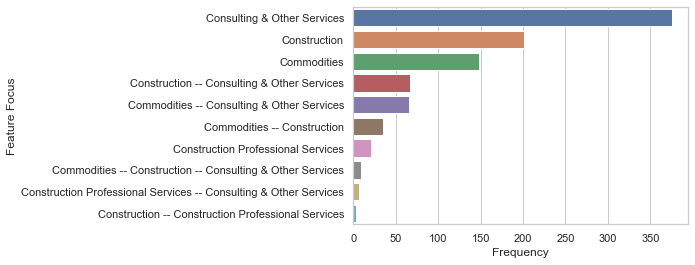

In [93]:
make_barplot(makelist_ofallstrings(df1['Classification']))

<AxesSubplot:xlabel='Frequency', ylabel='Feature Focus'>

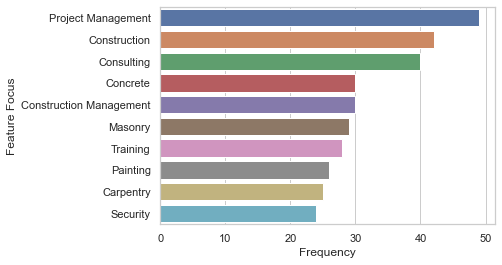

In [94]:
make_barplot(makelist_ofallstrings(df1['Key Words']))

<AxesSubplot:xlabel='Frequency', ylabel='Feature Focus'>

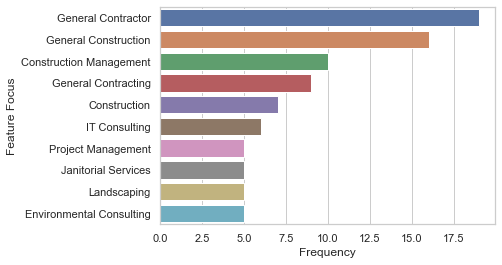

In [95]:
make_barplot(makelist_ofallstrings(df1['Specific Function']))

<AxesSubplot:xlabel='Frequency', ylabel='Feature Focus'>

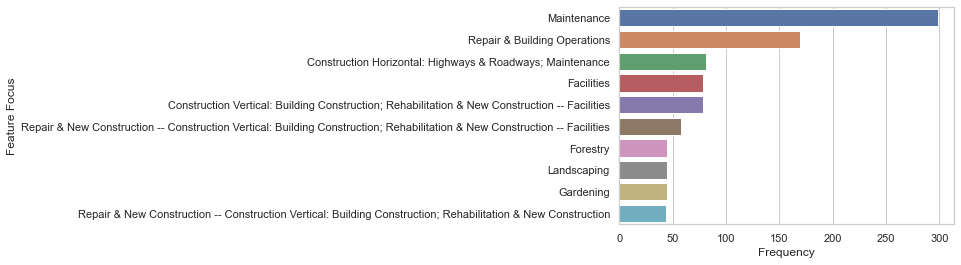

In [96]:
make_barplot(makelist_ofallstrings(df1['Categories']))

# Duplicate removal from master database

In [235]:
df_master = pd.read_csv(r'C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\Master_18Jan22.csv')

In [294]:
df_slave = pd.read_csv(r'C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\TwoNewCleaned_SDVOB_Listing_01_15_2022.csv')

In [237]:
df_master.columns

Index(['Id', 'CompanyName', 'DBAName', 'OwnerFirst', 'OwnerLast',
       'PhysicalAddress', 'CityId', 'City', 'StateId', 'State', 'Zip',
       'MailingAddress', 'City1', 'State1', 'Zip1', 'Phone', 'Fax', 'Email',
       'Website', 'Agency', 'CertificationType', 'CertifiedDate', 'Capability',
       'County', 'CommodityCodes', 'WorkRegions', 'Industry', 'IndustryId',
       'BusinessSize', 'GeneralLocation', 'Location', 'Verified', 'HeadLine',
       'About', 'WorkForce', 'NumberOfProjects', 'ABondingCapacity',
       'SPBondingCapacity', 'BusinessSizeId', 'CompanyType', 'ContactPerson'],
      dtype='object')

In [239]:
df_slave.columns

Index(['Unnamed: 0', 'Classification', 'Categories', 'About', 'Business Size',
       'Counties Served', 'Business Name', 'Street', 'City', 'State', 'Zip',
       'County Located', 'Home Region', 'Primary SDV Name',
       'Contact Email Address', 'Phone Number', 'Business Webpage',
       'Capablities'],
      dtype='object')

In [285]:
df_slave['Primary SDV Name'], df_slave['Business Name']

(0              Tolman , Rex
 1        Chamberlain , Dean
 2           Graham , Joseph
 3        LaMacchia , Joseph
 4         Nordstrom , Oscar
                ...         
 931       Joseph , Kenny D.
 932           Aulet  , Mark
 933    Kask , Aleksander T.
 934          Baek , Hyunwoo
 935          Finn , Brenden
 Name: Primary SDV Name, Length: 936, dtype: object,
 0      Tolman Engineering, Architecture, & Surveying,...
 1                         Mischler Financial Group, Inc.
 2                            Graham Restoration Co, Inc.
 3                         Navaid Technical Services, LLC
 4               Nordstrom Contracting & Consulting Corp.
                              ...                        
 931                        Brooklyn Cultivation Unit LLC
 932                                 A-Vet Enterprise LLC
 933                                     Bake Pharm, Inc.
 934         Veteran Medical Equipment and Supplies, Inc.
 935                                  Fathom Tes

In [245]:
df_slave.shape

(936, 18)

In [316]:
df_slave = df_slave.rename(columns={'Phone Number':'Phone'})

In [241]:
len(set(df_slave.Phone))

898

In [242]:
len(set(df_slave['Primary SDV Name']))

895

In [272]:
df_master2= (df_master.groupby(['Phone'])
               .agg({ 'CertificationType' : lambda x: x.tolist(),
                     'Industry' : lambda x: x.tolist(),
                    'BusinessSize' : lambda x: x.tolist(),
                     'Capability':lambda x: x.tolist(),
                   'CompanyName':lambda x: x.tolist(),
                    'OwnerFirst':lambda x: x.tolist(),
                    'OwnerLast':lambda x: x.tolist()})
               .reset_index())

In [301]:
df_master2

,Phone,CertificationType,Industry,BusinessSize,Capability,CompanyName,OwnerFirst,OwnerLast
0,3103089145,[MBE],[nan],[nan],[nan],[BRIIDG Supply Co.],[nan],[nan]
1,3474690806,[MBE],[Services Consultants],"[$100,000 - $499,000]",[Our Services include Office Cleaning Carpet c...,[1 Call Building Maintenance Corp],[Lorris],[Alleyne]
2,3476940830,[WBE],[Construction Consultants],[Over $5 million],"[Engineering Consulting, construction manageme...","[EnTech Engineering, P.C.]",[Soudabeh],[Bayat]
3,3477097446,[MBE],[Commodities],"[Less than $100,000]",[Genesis Signs &amp; Graphics is a full servic...,[Genesis Signs & Graphics],[Sean],[Phillips]
4,3478722702,"[MBE,WBE]",[Services Consultants],"[$100,000 - $499,000]","[Laundry services, industrial]","[Gold Bull Vend, LLC]",[LaChena],[Clark]
...,...,...,...,...,...,...,...,...
9817,9797780502,[WBE],[Commodities],[Over $5 million],[Office Furniture Manufacturer (Except Wood)],"[Neutral Posture, Inc.]",[Rebecca],[Boenigk]
9818,9802538319,[MBE],[Construction Consultants],"[$100,000 - $499,000]",[Winstead Management Group is a provider of Pr...,"[Winstead Management Group, LLC]",[Huron F.],[Winstead]
9819,9807220878,[MBE],[Construction Consultants],"[$500,000 - $999,999]",[Company able to provide construction and faci...,[BSL Galbreath Inc.],[Artis],[Galbreath]
9820,9809390094,[DBE],[nan],[nan],[Consultant;; Building Information Modeling; C...,"[BIMLOGIX,LLC]",[Melvin],[Wallace]


In [333]:
df_slave2.Phone = df_slave2.Phone.apply(lambda x: ''.join([i for i in x if str.isnumeric(i)]))
df_master2.Phone = df_master2.Phone.apply(lambda x: ''.join([i for i in x if str.isnumeric(i)]))

In [334]:
df_merge_try = pd.merge(df_slave2,df_master2,how='inner',on='Phone')

In [280]:
df_merge_try2 = pd.merge(df_slave2,df_master2,how='outer',on='Phone')

In [277]:
df_merge_try.to_csv(r'C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\TwoNewMerged_SDVOB_Listing_01_15_2022.csv')

In [295]:
 df_slave.drop_duplicates(subset ="Business Name",
                     keep = False, inplace = True)

In [299]:
 df_slave.drop_duplicates(subset ="Phone",
                     keep = False, inplace = True)

In [336]:
df_merge_try.Index_True = df_merge_try.Index_True.apply(list_2_int)

In [309]:
df_slave['Certification Type'] = ['SDVOB']*len(df_slave.index)

In [311]:
df_slave = df_slave.drop(columns=['Newcat'])

In [313]:
df_slave = df_slave.rename(columns={'Unnamed: 0':'Index_True'})

In [319]:
df_slave = df_slave.rename(columns={'Data_total_grams':'Capablities'})

In [329]:
df_slave2 = (df_slave.groupby(['Phone'])
               .agg({ 'Classification' : lambda x: x.tolist(),
                     'Categories' : lambda x: x.tolist(),
                    'Business Size' : lambda x: x.tolist(),
                     'Capablities':lambda x: x.tolist() ,
                     'Business Name':lambda x: x.tolist(),
                     'Index_True':lambda x: x.tolist()
                    })
               .reset_index())

In [330]:
for i in df_slave2.Index_True:
    if len(i)==2:
        print(i)

In [332]:
Counter(len(x) for x in df_slave2.Index_True)

Counter({1: 865})

In [323]:
def list_2_int(take_list):
    strings = [str(integer) for integer in take_list]
    a_string = "". join(strings)
    an_integer = int(a_string)
    return an_integer

In [337]:
df_slave2.Index_True = df_slave2.Index_True.apply(list_2_int)

In [339]:
df_final = pd.concat([df_slave2,df_merge_try],axis=0)

In [328]:
for i in df_slave2.Index_True:
    if len(str(i).split())==2:
        print(i)

In [341]:
df_final.drop_duplicates(subset ="Phone",
                     keep = False, inplace = True)

In [345]:
len(set(df_final.Index_True))

814

In [352]:
type(df_final.Index_True[0])

numpy.int64

In [372]:
list_new = list(df_final.Index_True)

In [374]:
list_new.sort()

In [376]:
len(set(list_new))

814

In [379]:
df_slave_merge = df_slave.loc[list_new]

In [384]:
total_pd2 = pd.concat([df_master,df_slave],axis=0)

In [386]:
total_pd2.to_csv(r'C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\Companies.csv')

In [382]:
total_pd

,Index_True,Classification,Categories,About,Key Words,Business Size,Counties Served,Business Name,NYS Vendor ID Number,Street,...,Location,Verified,HeadLine,WorkForce,NumberOfProjects,ABondingCapacity,SPBondingCapacity,BusinessSizeId,CompanyType,ContactPerson
0,0.0,Construction Consultants,"Architectural, Engineering & Surveying -- Envi...",Civil Engineering - Design and Construction,"Engineer, Engineering, Architect, Architecture...","$1,000,000 - $4,999,999",statewide,"Tolman Engineering, Architecture, & Surveying,...",1.100125e+09,3610 Lawson Road,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Services Consultants,Financial,"Investment Banking, Broker Dealer","Investments, Financial Advisor, Broker Dealer,...","Over $5,000,000",statewide,"Mischler Financial Group, Inc.",1.100138e+09,1111 Bayside Drive Suite 100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Construction,Construction Vertical: Building Construction; ...,"Roofing, Exterior, and Interior","Roofing, Masonry, Waterproofing, Concrete, Bui...","$500,000 - $999,999",Bronx -- Kings -- Nassau -- Queens -- Richmond...,"Graham Restoration Co, Inc.",1.100135e+09,59-45 56 Ave.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Services Consultants,Administrative & Technical -- Information Tech...,Integrated Support Solutions,"Logistics, Consulting, Engineering Services, M...","$100,000 - $499,999",statewide,"Navaid Technical Services, LLC",1.100137e+09,12457 Fitzroy Street,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Construction,Construction Vertical: Building Construction; ...,General Contractor,"General Contractor, Rough Carpentry, Finish Ca...","$1,000,000 - $4,999,999",Bronx -- Dutchess -- New York -- Orange -- Roc...,Nordstrom Contracting & Consulting Corp.,1.100113e+09,36 Theills Mt. Ivy Road,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,18.0,3.0,Yolanda Sullivan
10062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Wissam Akra
10063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Wissam Akra
10064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,LJ Finney


In [38]:
"""
for i in range(len(df_slave.Phone)):
    for j in df_merge_try.Phone:
        if df_slave.Phone[i] == j:
            df_slave.drop(dfObj.index[i])
        #i+=1 """

'\nfor i in range(len(df_slave.Phone)):\n    for j in df_merge_try.Phone:\n        if df_slave.Phone[i] == j:\n            df_slave.drop(dfObj.index[i])\n        #i+=1 '

In [40]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/paritoshk/finalpipelinefortotaldatabaseexplore


'https://jovian.ai/paritoshk/finalpipelinefortotaldatabaseexplore'